# Gradient Descent

La **squared error loss** function è utile quando abbiamo a che fare con problemi di linear regression su dataset piccoli. Se un dataset è molto grande, o la funzione obiettivo non ammette un minimizzatore analitico, può essere computazionalmente costoso - quindi usiamo altri metodi, che non sono in forma chiusa.

In questa lezione introduciamo il metodo **Gradient Descent** (discesa del gradiente), uno dei modelli più fondamentali nel supervised learning per i problemi di ottimizzazione basati su gradiente.

Per semplificare la comprensione di questo metodo risulta utile analizzarne l'interpretazione geometrica:  
considerando la nostra funzione costo $ J(\theta) $ questa possiamo interpretarla come una superficie nello spazio definita nello spazio dei parametri. Un qualsiasi vettore dei parametri di modello $ \theta \in R^{p+1} $ non risulta essere nient'altro che un generico punto su questa superficie per un dato valore di parametri $ [\theta_0 ... \theta_n] $. Allora, il vettore ottimo $ \hat{\theta} $ non sarà altro che il punto più basso di questa superficie.  

Mentre nella *Linear Regression* andavamo ad analizzare il problema attraverso la minimizzazione del quadrato dei residui, che ci permetteva di avere una soluzione ottimale in forma chiusa (soluzione in un numero finito di operazioni), con la *Gradient Descent* risolviamo il problema attraverso una intuizione "geometrica": poichè il nostro obiettivo è raggiungere il punto più basso della curva, non ci basterà che muoverci in maniera iterativa *sulla curva* nella direzione del punto più basso. Ma come facciamo se non sappiamo qual è il punto più basso?  
Geometricamente, sappiamo che il *gradiente* della funzione costo $ J(\theta) $ ovvero $ \nabla_{\theta}J(\theta) $ punta nella direzione di crescita più ripida del costo (dipendente dai residui). Allora, muovendoci nella direzione opposta di questo gradiente, punteremo nella direzione di discesa, e dunque verso un minimo.  

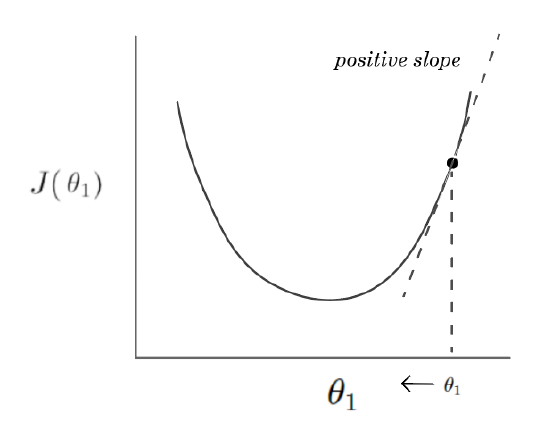

### Sensitività ai parametri e movimento

Abbiamo detto che il vettore $ \theta $ rappresenta un punto sulla superficie. Come ogni punto, questo è dotato di cordinate che lo posizionano nello spazio. Allora, ogni singola componente $ \theta_i $ del vettore dei parametri non sarà altro che una coordinata sulla superficie costo.  
Modificando una *componente* del vettore dei parametri e mantenendo fissi gli altri ci muoviamo lungo una specifica direzione di movimento.  
Il vettore gradiente $ \nabla_{\theta}J(\theta) $ è composto da componenti che rappresentano la sensibilità del costo rispetto a ciascuna coordinata. La componente $ i $-esima del gradiente, $ \frac{\partial J(\theta)}{\partial \theta_i} $ è il *gradiente parziale*, e ci dice quanto il costo cambia se modifichiamo la coordinata $ \theta_i $ mantenendo fissi gli altri parametri. Questa componente è detta "sensitività" del costo rispetto alla coordinata $ \theta_i $.  

Vogliamo però capire, una volta identificata la direzione di discesa, di quanto dobbiamo muoverci in quella direzione. Per questo motivo, introduciamo un nuovo iperparametro, detto **learning rate** $ \gamma $, che ci dice di quanto dobbiamo scalare il gradiente per muoverci nella direzione di discesa. Il learning rate controlla la velocità di apprendimento del modello: tanto è più piccolo e tanto più l'apprendimento sarà lento ma stabile; tanto è più grande e tanto più l'apprendimento sarà veloce ma instabile, causando oscillazioni o divergenze (minimo globale non raggiunto).

Dunque, come modifichiamo i parametri del modello? Ovvero come facciamo ad aggiornare i parametri del modello?  
Il processo di aggiornamento dei parametri del modello è dato dalla seguente formula:
$ \theta^{t+1} := \theta^{t} - \gamma \nabla_{\theta}J(\theta^{t}) $
Questa formula ci dice che per aggiornare i parametri del modello per il passo *successivo*, dobbiamo sottrarre al vettore dei parametri $ \theta $ del passo attuale, il prodotto tra il learning rate $ \gamma $ e il gradiente $ \nabla_{\theta}J(\theta) $. In questo modo ci muoviamo nella direzione di discesa, scalando il passo di discesa con il learning rate, ovvero mantenendoli *proporzinali*.  Da questa formula, possiamo notare che se il gradiente è grande, allora il passo di discesa sarà grande, e viceversa.  Inoltre, possiamo osservare la natura **iterativa** di questo metodo rispetto alla soluzione in forma chiusa: per raggiungere il punto più basso della curva, dobbiamo iterare questo processo di aggiornamento dei parametri del modello fino a quando non raggiungiamo un punto in cui il gradiente è sufficientemente piccolo (ovvero, quando siamo vicini al minimo).

### Gradiente della Regressione Lineare e Quadrati Minimi (least squares)

In problemi di regressione lineare con *loss function* basata sull'errore quadratico medio, la funzione costo è una curva convessa. Questo garantisce il fatto che:
- ci sia sempre un *singolo* minimo globale
- la superficie sia liscia, e dunque il gradiente sia ben definito in ogni punto della curva
- seguendo la discenza da qualsiasi punto della curva, raggiungeremo sempre il minimo globale
E' proprio grazie a queste proprietà geometriche che possiamo applicare il metodo di Gradient Descent per risolvere il problema di ottimizzazione della regressione lineare.  
  
Il gradiente della funzione costo $ J(\theta) $ per la regressione lineare, ipotizzando una funzione costo basata sui quadrati minimi, è dato dalla seguente formula:
$ \nabla_{\theta}J(\theta) = \frac{2}{n} X^T(X\theta - y) $
Questa formula ci dice che il gradiente è dato da una matrice di covarianza tra le feature (ovvero $ X^T X $) e una matrice di covarianza tra le feature e i target (ovvero $ X^T y $). Ponendo a 0 il gradiente otteniamo la forma normale dell'equazione, ma in questo caso utilizzeremo un metodo iterativo per minimizzare il costo.

### Soluzione 1: Batch Gradient Descent
Il metodo di Batch Gradient Descent consiste nel calcolare il gradiente su tutto il dataset ad ogni iterazione, e poi aggiornare i parametri del modello. Questo metodo è molto efficiente per dataset di piccole dimensioni, ma può essere molto lento per dataset di grandi dimensioni, poiché richiede di calcolare il gradiente su tutto il dataset ad ogni iterazione.

La regola di aggiornamento dei parametri del modello per il Batch Gradient Descent è data dalla seguente formula:
$ \theta^{t+1} = \theta^{t} - \gamma\nabla J(\theta) = \theta^{t} - \frac{2\gamma}{n} X^T(X\theta^{t} - y) $  
Dunque l'algoritmo è:
1. si parte da un vettore di parametri iniziale $ \theta^0 $  
2. (loop)  
2.1. si calcola il vettore dei residui sull'intero dataset al passo t $ r^t = X\theta^t - y $  
2.2. si calcola il gradiente al passo t $ \nabla J(\theta^t) = \frac{2}{n} X^T r^t $  
2.3. si aggiorna il vettore dei parametri $ \theta^{t+1} = \theta^t - \gamma \nabla J(\theta^t) $ 
3. si ripete il loop fino a quando non si raggiunge un punto in cui il gradiente è sufficientemente piccolo (ovvero, quando siamo vicini al minimo).  

### Learning Rate e Feature Scaling

Il learning rate è un iperparametro che controlla la velocità di apprendimento del modello. Se il learning rate è troppo piccolo, l'apprendimento sarà lento e potrebbe richiedere molte iterazioni per convergere al minimo globale. Se il learning rate è troppo grande, l'apprendimento sarà veloce ma instabile, causando oscillazioni o divergenze (minimo globale non raggiunto). Per questo motivo, è importante scegliere un learning rate appropriato per il nostro problema. Un modo per scegliere un learning rate appropriato è quello di partire da una serie di valori candidati $ \gamma = [ \gamma_0 \gamma_1 ... \gamma_m] $ e progressivamente scegliere il valore più grande che consente una riduzione smooth della funzione costo.  

Un altro elemento da tenere in considerazione, come abbiamo già visto negli algoritmi k-NN e DT, è la scala delle feature del dataset. Se le feature del dataset hanno scale molto diverse, il gradiente potrebbe essere molto più grande per alcune feature rispetto ad altre, e questo potrebbe causare problemi di convergenza. Per questo motivo, è importante utilizzare una tecnica chiamata **feature scaling** (scalatura delle feature), che consiste nel normalizzare le feature del dataset in modo che abbiano una media di 0 e una deviazione standard di 1. In questo modo, tutte le feature avranno lo stesso ordine di grandezza, e il learning rate potrà essere scelto in modo più semplice, poiché non dovremo preoccuparci di feature con valori molto grandi o molto piccoli che potrebbero causare problemi di convergenza.  
Le principali tecniche di feature scaling sono la **standardizzazione** (standardization) e la **normalizzazione** (normalization). La standardizzazione consiste nel sottrarre la media e dividere per la deviazione standard, mentre la normalizzazione consiste nel scalare i valori delle feature in un intervallo specifico, ad esempio [0, 1].  
Una volta scalate le feature, generalmente un singolo learning rate è sufficiente per tutte le feature, poiché tutte le feature avranno lo stesso ordine di grandezza.

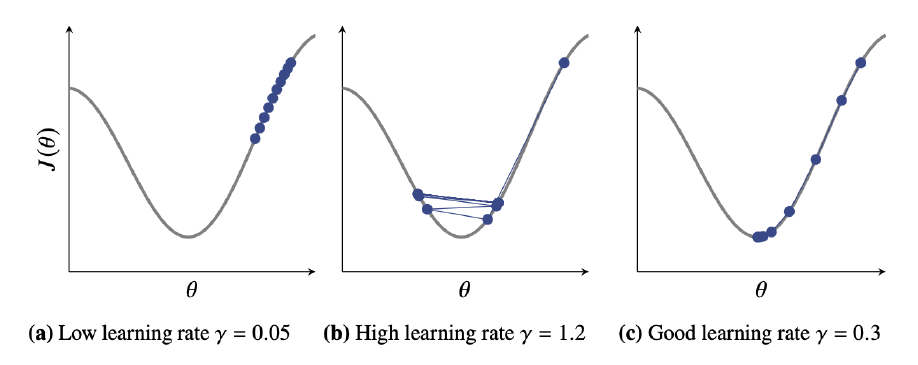


### Soluzione 2: Stochastic Gradient Descent 
Il metodo di Stochastic Gradient Descent (SGD) consiste nel calcolare il gradiente su un singolo esempio del dataset ad ogni iterazione, e poi aggiornare i parametri del modello. Questo metodo è molto più veloce per dataset di grandi dimensioni, poiché richiede di calcolare il gradiente su un singolo esempio ad ogni iterazione, ma può essere molto rumoroso, poiché il gradiente calcolato su un singolo esempio può essere molto diverso dal gradiente calcolato su tutto il dataset. La regola di aggiornamento dei parametri del modello per lo Stochastic Gradient Descent è data dalla seguente formula: $ \theta^{t+1} := \theta^{t} - 2\gamma x_i^T(x_i\theta^{t} - y_i) $ Dove $ x_i $ è l'esempio i-esimo del dataset, e $ y_i $ è il target i-esimo del dataset. ### Soluzione 3: Mini-batch Gradient Descent Il metodo di Mini-batch Gradient Descent consiste nel calcolare il gradiente su un piccolo batch di esempi del dataset ad ogni iterazione, e poi aggiornare i parametri del modello. Questo metodo è un compromesso tra il Batch Gradient Descent e lo Stochastic Gradient Descent, poiché richiede di calcolare il gradiente su un piccolo batch di esempi ad ogni iterazione, ma può essere più stabile rispetto allo Stochastic Gradient Descent, poiché il gradiente calcolato su un piccolo batch di esempi può essere più rappresentativo del gradiente calcolato su tutto il dataset. La regola di aggiornamento dei parametri del modello per il Mini-batch Gradient Descent è data dalla seguente formula: $ \theta^{t+1} := \theta^{t} - \frac{2\gamma}{m} X_{batch}^T(X_{batch}\theta^{t} - y_{batch}) $ Dove $ X_{batch} $ è il batch di esempi del dataset, e $ y_{batch} $ è il batch di target del dataset.
